In [22]:

import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


In [23]:
df = pd.read_csv('C:/censusincomedata.csv')

print(df.shape)

print(df.head())

print(df.info())
print(df.describe().T)

#DATA CLEANIG



(32561, 15)
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-S

In [24]:
for column_name in df.columns:
    print("{} unique values in the column".format(column_name))
    print("{}".format(df[column_name].unique()),"\n")

age sütundaki benzersiz değerler
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass sütundaki benzersiz değerler
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' NaN' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt sütundaki benzersiz değerler
[ 77516  83311 215646 ...  34066  84661 257302] 

education sütundaki benzersiz değerler
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

education-num sütundaki benzersiz değerler
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status sütundaki benzersiz değerler
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Wido

Text(0, 0.5, 'Count')

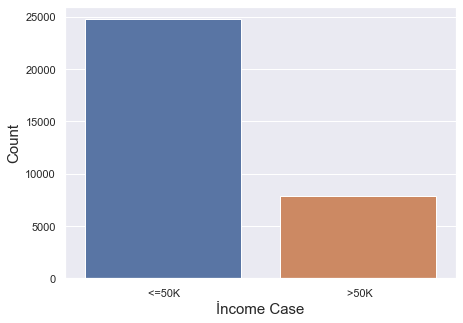

In [25]:
df['native-country'] = df['native-country'].replace({'NaN'}, 'Unknown', regex=True)
df['occupation'] = df['occupation'].replace({'NaN'}, 'Unknown', regex=True)
df['workclass'] = df['workclass'].replace({'NaN'}, 'Unknown', regex=True)


plt.figure(figsize=(7,5))
sns.countplot(df["income"])
plt.xlabel("İncome Case",fontsize=15)
plt.ylabel("Count",fontsize=15)


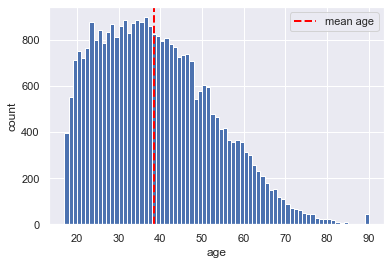

In [26]:
#NÜMERİK DEĞERLER 
ages = df['age'].hist(bins=max(df['age'])-min(df['age']))
mean_val = np.mean(df['age'])
plt.axvline(mean_val, linestyle='dashed', linewidth=2, color='red', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

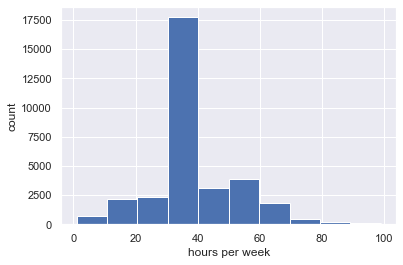

In [27]:
df['hours-per-week'].hist()
plt.xlabel('hours per week')
plt.ylabel('count')
plt.show()


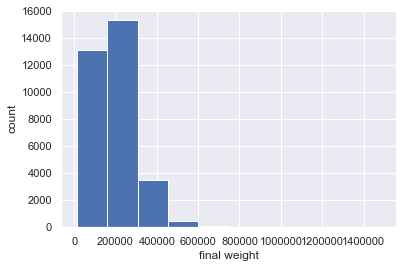

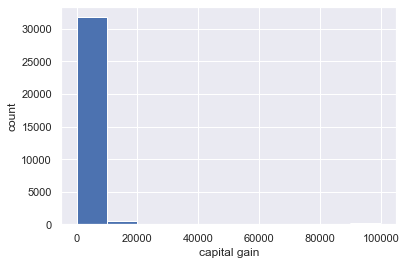

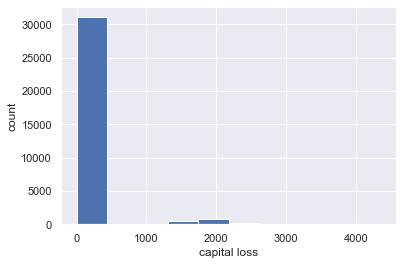

In [28]:
df['fnlwgt'].hist()
plt.xlabel('final weight')
plt.ylabel('count')
plt.show()

df["capital-gain"].hist()
plt.xlabel('capital gain')
plt.ylabel('count')
plt.show()

df["capital-loss"].hist()
plt.xlabel('capital loss')
plt.ylabel('count')
plt.show()


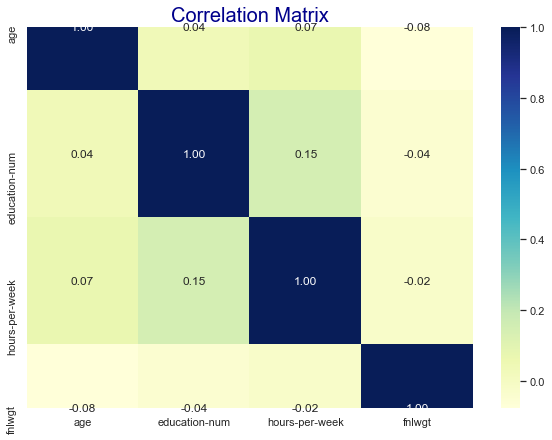

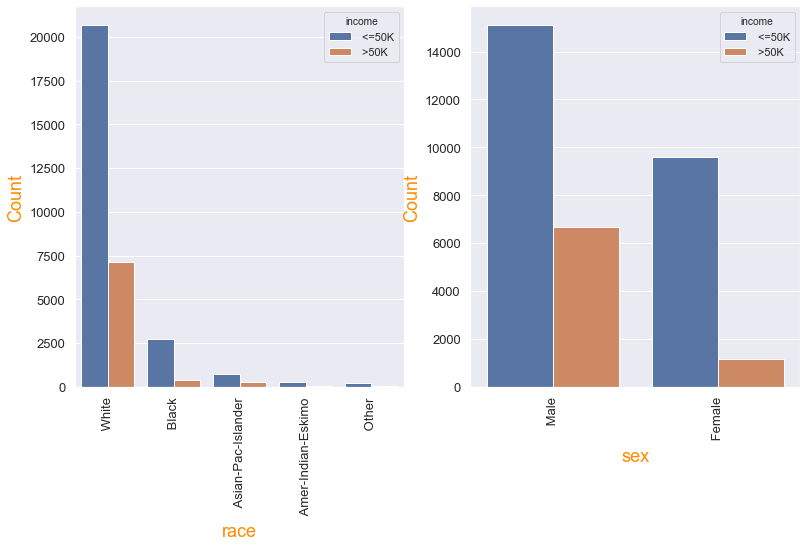

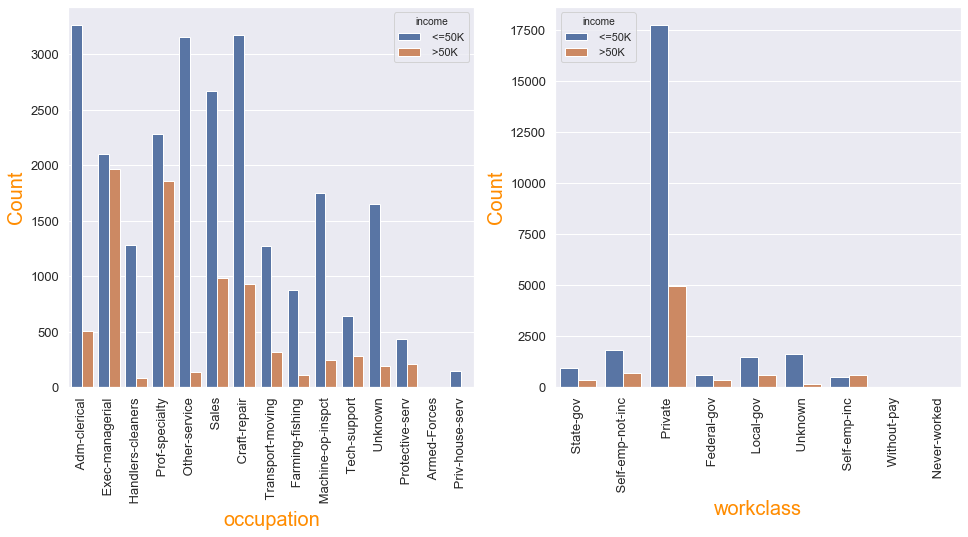

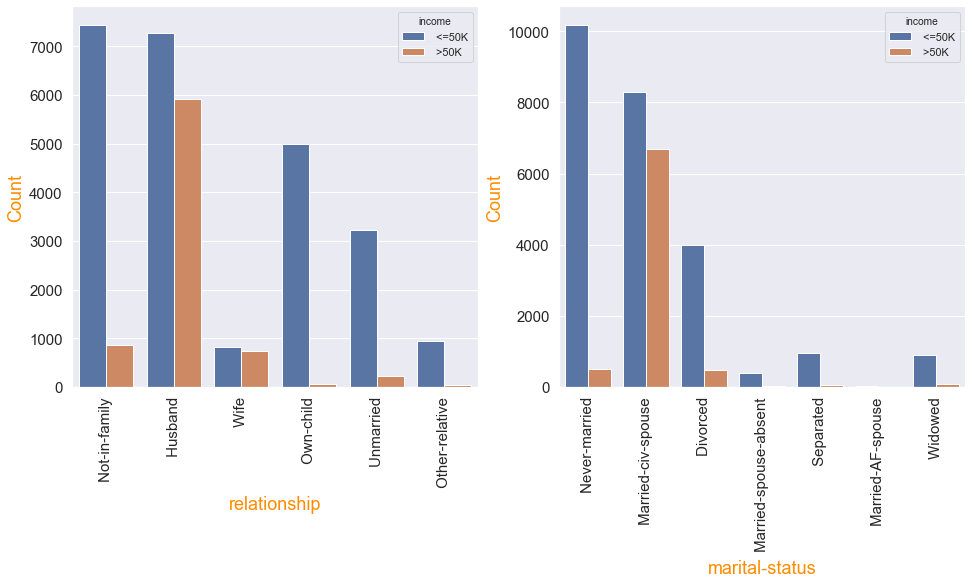

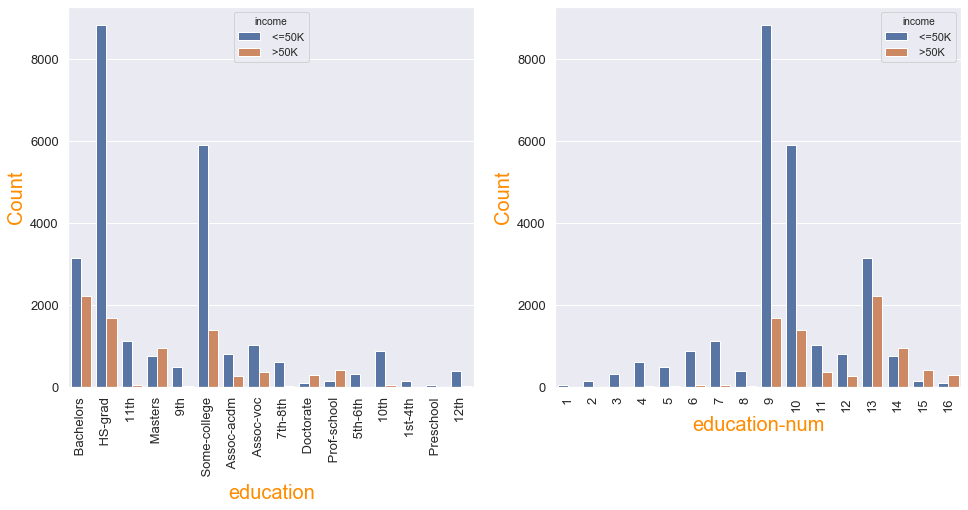

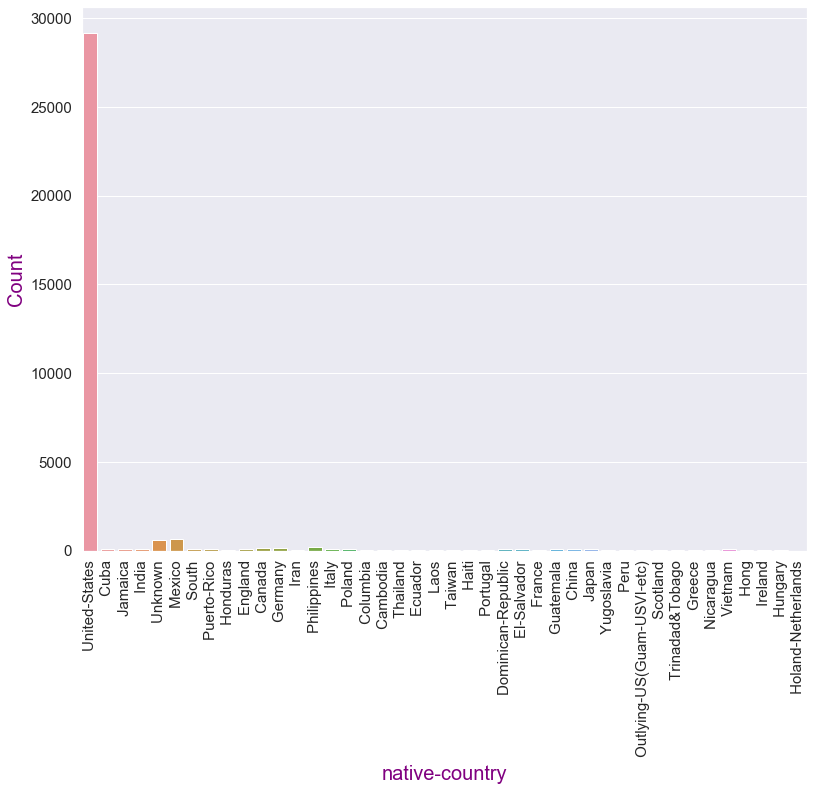

In [29]:
# Correlation matrix between numerical values
list=['age','education-num',"hours-per-week","fnlwgt"]

plt.figure(figsize=(10,7))
sns.heatmap(df[list].corr(),annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.title("Correlation Matrix",color="darkblue",fontsize=20)
plt.show()

plt.figure(figsize=(13,7))


#Categorical Variables's Graphs by Count Plot about İncome

deg=["race","sex"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=df,hue='income')
    plt.xlabel(deg[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()

plt.figure(figsize=(16,7))

deg=["occupation","workclass"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=df,hue="income")
    plt.xlabel(deg[i],color="darkorange",fontsize=20)
    plt.ylabel("Count",color="darkorange",fontsize=20)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()

plt.figure(figsize=(16,7))

deg = ["relationship","marital-status"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=df,hue="income")
    plt.xlabel(deg[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)

plt.show()    

plt.figure(figsize=(16,7))

deg=["education","education-num"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=df,hue="income")
    plt.xlabel(deg[i],color="darkorange",fontsize=20)
    plt.ylabel("Count",color="darkorange",fontsize=20)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()
    
plt.figure(figsize=(13,10))
sns.countplot(x=df["native-country"],data=df)
plt.xlabel("native-country",color="purple",fontsize=20)
plt.ylabel("Count",color="purple",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [30]:

df1 = pd.get_dummies(df["workclass"])
df2 = pd.get_dummies(df["education"])
df3 = pd.get_dummies(df["marital-status"])
df4 = pd.get_dummies(df["occupation"])
df5 = pd.get_dummies(df["relationship"])
df6 = pd.get_dummies(df["race"])
df7= pd.get_dummies(df["sex"])
df8 = pd.get_dummies(df["native-country"])

encoder= LabelEncoder()
df['income'] = encoder.fit_transform(df['income'].astype('str'))

df  = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8],axis=1)
df.drop(['native-country','workclass',"education","marital-status",
         "occupation","relationship","race","sex"],axis=1, inplace=True)   
print(df.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income   Federal-gov   Local-gov   Never-worked  ...   Puerto-Rico  \
0       0             0           0              0  ...             0   
1       0             0           0              0  ...             0   
2       0             0           0              0  ...             0   
3       0             0           0              0  ...             0   
4       0             0           0              0  ...             0   

    Scotland   South   Taiwan   Thailand   Trinadad&Tobago   United-States  \
0          0       0

In [31]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler

#sTANDARTLAŞTIRMA

X = StandardScaler().fit_transform(df.loc[:, df.columns != 'income'])
Y = df['income']

kf = KFold(n_splits=5, shuffle=True, random_state=42)



In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix


In [33]:
tree = DecisionTreeClassifier(criterion="gini")
pred = cross_val_predict(tree, X, Y, cv=kf)
print("DecisionTreeClassifier")
print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')



DecisionTreeClassifier
Accuracy score: 0.816 



KNeighborsClassifier
Accuracy score: 0.8243 

Best Parameters: {'n_neighbors': 15}
Best Score: 0.8308098645618992
Best KNN Classifier
Accuracy score: 0.8308 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24720
           1       0.68      0.56      0.61      7841

    accuracy                           0.83     32561
   macro avg       0.77      0.74      0.75     32561
weighted avg       0.82      0.83      0.82     32561



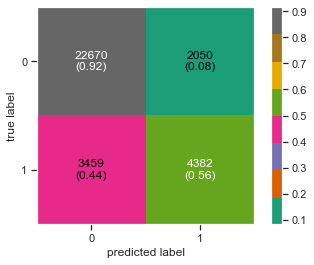

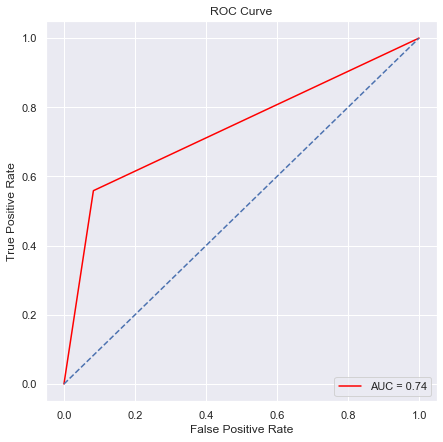

In [34]:
knn=KNeighborsClassifier()
pred = cross_val_predict(knn, X, Y, cv=kf)

print("KNeighborsClassifier")
print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')

knn_params = {'n_neighbors':[10,15,20,25,30]}

knn_grid = GridSearchCV(knn, knn_params,
                         cv=kf)

knn_grid.fit(X, Y)

print('Best Parameters: {}'.format(knn_grid.best_params_))
print('Best Score: {}'.format(knn_grid.best_score_))

knn_best=knn=KNeighborsClassifier(n_neighbors=15)
pred = cross_val_predict(knn_best, X, Y, cv=kf)

print("Best KNN Classifier")
print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')
print(classification_report(Y, pred))

cms=confusion_matrix(Y, pred)
fig, ax = plot_confusion_matrix(conf_mat=cms,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(7,7))
plt.title('ROC Curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Best Parameters: {'max_leaf_nodes': 128, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 40, 'min_samples_split': 160}
Best Score: 0.8584502932956605
Best Decision Tree Classifier
Accuracy score: 0.8585 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     24720
           1       0.76      0.60      0.67      7841

    accuracy                           0.86     32561
   macro avg       0.82      0.77      0.79     32561
weighted avg       0.85      0.86      0.85     32561



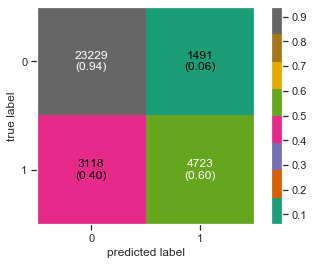

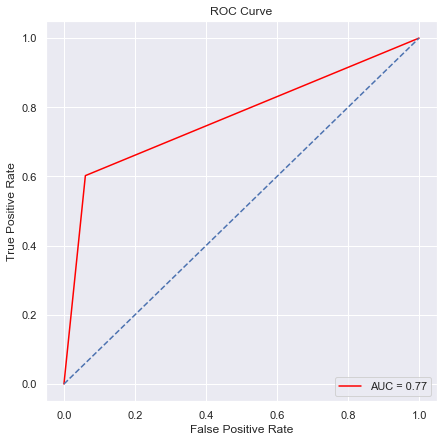

In [35]:

tree_params = {'max_leaf_nodes':[8,16,32,64,128],
               'min_impurity_decrease':[0.0001,0.001,0.1,0.2],'min_samples_split':[40,80,160,320],'min_samples_leaf':[40,80,160,320]}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=kf)

tree_grid.fit(X, Y)


print('Best Parameters: {}'.format(tree_grid.best_params_))
print('Best Score: {}'.format(tree_grid.best_score_))


tree_best = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=128, min_impurity_decrease= 0.0001, min_samples_leaf=40, min_samples_split=160)
pred = cross_val_predict(tree_best, X, Y, cv=kf)

print("Best Decision Tree Classifier")
print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')
print(classification_report(Y, pred))

cms=confusion_matrix(Y, pred)
fig, ax = plot_confusion_matrix(conf_mat=cms,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(7,7))
plt.title('ROC Curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



CatBoostClassifier
Learning rate set to 0.042149
0:	learn: 0.6514906	total: 37.1ms	remaining: 37s
1:	learn: 0.6136758	total: 51.4ms	remaining: 25.6s
2:	learn: 0.5793469	total: 65.1ms	remaining: 21.6s
3:	learn: 0.5517710	total: 78.9ms	remaining: 19.7s
4:	learn: 0.5255844	total: 92.6ms	remaining: 18.4s
5:	learn: 0.5056219	total: 106ms	remaining: 17.6s
6:	learn: 0.4844897	total: 123ms	remaining: 17.4s
7:	learn: 0.4653682	total: 137ms	remaining: 17s
8:	learn: 0.4484306	total: 155ms	remaining: 17.1s
9:	learn: 0.4342627	total: 171ms	remaining: 17s
10:	learn: 0.4223061	total: 186ms	remaining: 16.7s
11:	learn: 0.4119487	total: 201ms	remaining: 16.6s
12:	learn: 0.4025137	total: 215ms	remaining: 16.3s
13:	learn: 0.3941161	total: 229ms	remaining: 16.1s
14:	learn: 0.3885338	total: 244ms	remaining: 16s
15:	learn: 0.3823322	total: 257ms	remaining: 15.8s
16:	learn: 0.3762399	total: 271ms	remaining: 15.7s
17:	learn: 0.3712907	total: 287ms	remaining: 15.7s
18:	learn: 0.3669481	total: 301ms	remaining: 1

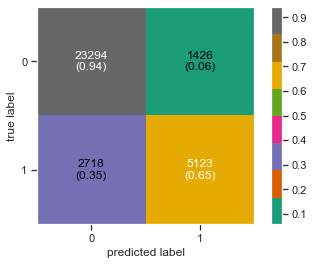

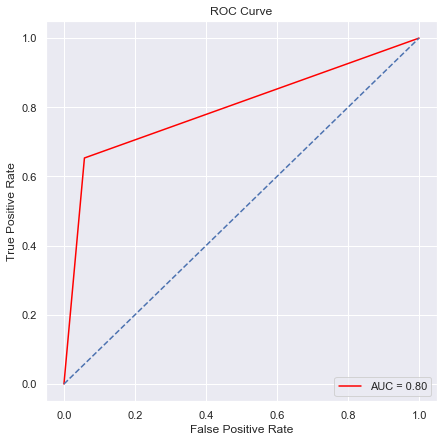

AdaBoostClassifier
Accuracy score: 0.8592 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     24720
           1       0.76      0.61      0.68      7841

    accuracy                           0.86     32561
   macro avg       0.82      0.77      0.79     32561
weighted avg       0.85      0.86      0.85     32561



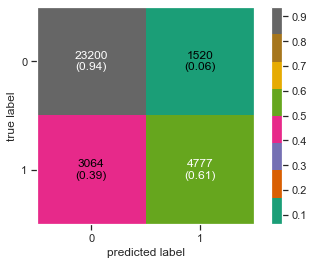

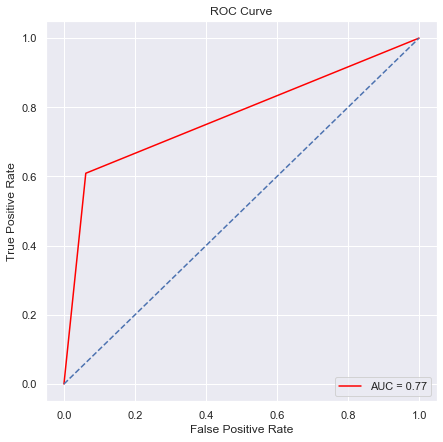

GradientBoostingClassifier
Accuracy score: 0.8658 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     24720
           1       0.79      0.60      0.68      7841

    accuracy                           0.87     32561
   macro avg       0.84      0.78      0.80     32561
weighted avg       0.86      0.87      0.86     32561



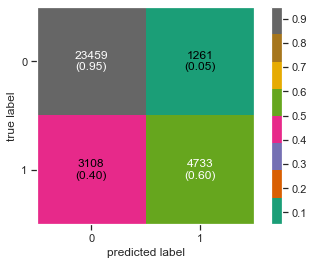

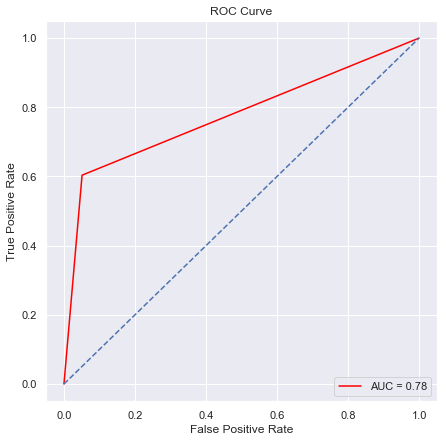

RandomForestClassifier


C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\ensemble\forest.py:2

Accuracy score: 0.8459 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     24720
           1       0.73      0.58      0.64      7841

    accuracy                           0.85     32561
   macro avg       0.80      0.75      0.77     32561
weighted avg       0.84      0.85      0.84     32561



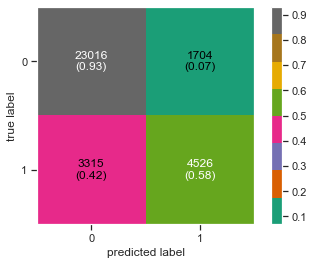

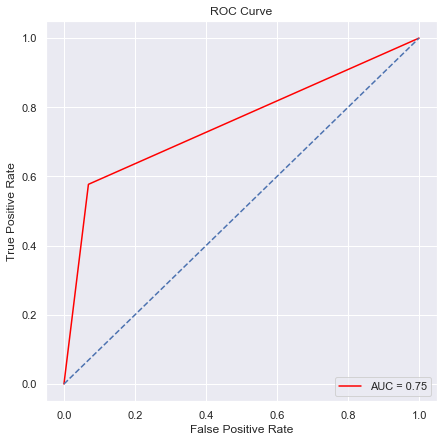

In [36]:

classifiers = [
    CatBoostClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(), 
    RandomForestClassifier()
    ]


for i, c in enumerate(classifiers):
    
    x_axs = i%2
    y_axs = int(i/2)
    # print(c)
    print(type(c).__name__)
    pred = cross_val_predict(c, X, Y, cv=kf)
    print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')
    print(classification_report(Y, pred))
    
    cm=confusion_matrix(Y, pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
    plt.show()


    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc

    plt.figure(figsize=(7,7))
    plt.title('ROC Curve')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



MLPClassifier
Accuracy score: 0.851 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     24720
           1       0.73      0.60      0.66      7841

    accuracy                           0.85     32561
   macro avg       0.81      0.76      0.78     32561
weighted avg       0.84      0.85      0.85     32561



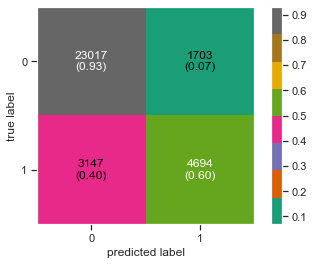

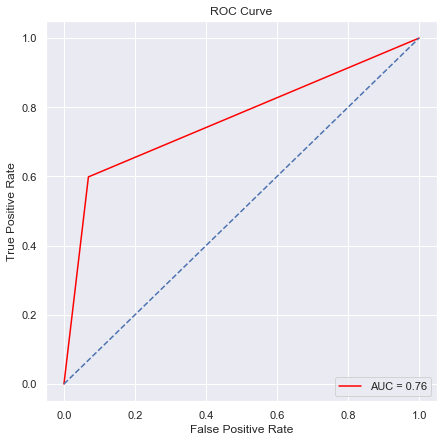

KNeighborsClassifier
Accuracy score: 0.8303 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24720
           1       0.68      0.56      0.61      7841

    accuracy                           0.83     32561
   macro avg       0.77      0.74      0.75     32561
weighted avg       0.82      0.83      0.82     32561



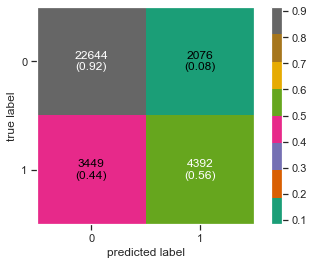

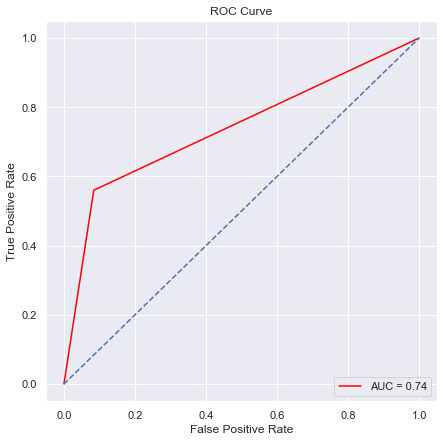

In [37]:
classifiers = [
    
    MLPClassifier(hidden_layer_sizes=(50,50,50), activation='identity',max_iter=200),
    KNeighborsClassifier(n_neighbors=17,weights='distance')
]


for i, c in enumerate(classifiers):
    
    x_axs = i%2
    y_axs = int(i/2)
    
    # print(c)
    print(type(c).__name__)
    pred = cross_val_predict(c, X, Y, cv=kf)
    print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')
    print(classification_report(Y, pred))
    
    cm=confusion_matrix(Y, pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
    plt.show()


    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc

    plt.figure(figsize=(7,7))
    plt.title('ROC Curve')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    
   


In [38]:
from sklearn.model_selection import GridSearchCV

params = { 
        'max_depth': [4,5,6,7,8,9,10],
          }

classifier = CatBoostClassifier()

grid = GridSearchCV(classifier, param_grid=params, cv=kf)
search_result = grid.fit(X, Y)

# GridSearch results
means = search_result.cv_results_['mean_test_score']
params = search_result.cv_results_['params']
for m, p in zip(means, params):
    print(f"{m} with: {p}")

Learning rate set to 0.042149
0:	learn: 0.6533712	total: 17.5ms	remaining: 17.5s
1:	learn: 0.6162052	total: 28ms	remaining: 14s
2:	learn: 0.5848598	total: 42.7ms	remaining: 14.2s
3:	learn: 0.5578933	total: 53.6ms	remaining: 13.3s
4:	learn: 0.5315942	total: 64.5ms	remaining: 12.8s
5:	learn: 0.5116905	total: 77.9ms	remaining: 12.9s
6:	learn: 0.4937582	total: 88ms	remaining: 12.5s
7:	learn: 0.4770488	total: 98.8ms	remaining: 12.2s
8:	learn: 0.4622139	total: 112ms	remaining: 12.3s
9:	learn: 0.4498811	total: 123ms	remaining: 12.2s
10:	learn: 0.4387041	total: 135ms	remaining: 12.1s
11:	learn: 0.4287946	total: 149ms	remaining: 12.2s
12:	learn: 0.4203815	total: 159ms	remaining: 12.1s
13:	learn: 0.4111579	total: 171ms	remaining: 12s
14:	learn: 0.4060659	total: 184ms	remaining: 12.1s
15:	learn: 0.3987634	total: 195ms	remaining: 12s
16:	learn: 0.3946524	total: 207ms	remaining: 11.9s
17:	learn: 0.3902126	total: 216ms	remaining: 11.8s
18:	learn: 0.3869077	total: 228ms	remaining: 11.8s
19:	learn: 0.

0:	learn: 0.6631297	total: 14.9ms	remaining: 14.9s
1:	learn: 0.6348573	total: 29.4ms	remaining: 14.7s
2:	learn: 0.6081658	total: 43ms	remaining: 14.3s
3:	learn: 0.5858218	total: 56.9ms	remaining: 14.2s
4:	learn: 0.5638382	total: 70.6ms	remaining: 14s
5:	learn: 0.5462805	total: 84.6ms	remaining: 14s
6:	learn: 0.5272854	total: 99.3ms	remaining: 14.1s
7:	learn: 0.5091908	total: 113ms	remaining: 14s
8:	learn: 0.4945645	total: 128ms	remaining: 14.1s
9:	learn: 0.4799532	total: 143ms	remaining: 14.1s
10:	learn: 0.4672093	total: 157ms	remaining: 14.1s
11:	learn: 0.4544906	total: 171ms	remaining: 14.1s
12:	learn: 0.4442453	total: 185ms	remaining: 14s
13:	learn: 0.4346622	total: 199ms	remaining: 14s
14:	learn: 0.4249164	total: 213ms	remaining: 14s
15:	learn: 0.4185548	total: 228ms	remaining: 14s
16:	learn: 0.4125986	total: 242ms	remaining: 14s
17:	learn: 0.4065578	total: 259ms	remaining: 14.1s
18:	learn: 0.4010232	total: 273ms	remaining: 14.1s
19:	learn: 0.3945543	total: 292ms	remaining: 14.3s
2

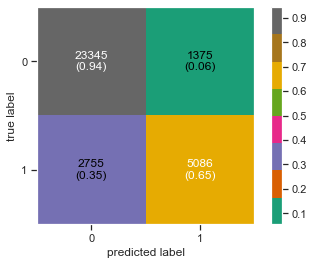

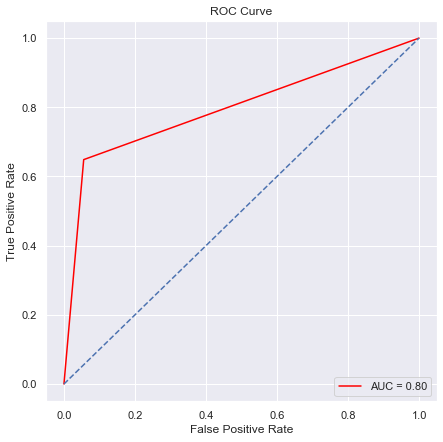

In [39]:
CBC=CatBoostClassifier(learning_rate=0.03)
pred = cross_val_predict(CBC, X, Y, cv=kf)
cm=confusion_matrix(Y, pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(7,7))
plt.title('ROC Curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0:	learn: 0.6671965	total: 39.9ms	remaining: 39.9s
1:	learn: 0.6428824	total: 70.1ms	remaining: 35s
2:	learn: 0.6186556	total: 99.2ms	remaining: 33s
3:	learn: 0.5974755	total: 136ms	remaining: 33.8s
4:	learn: 0.5797606	total: 166ms	remaining: 33.1s
5:	learn: 0.5645994	total: 196ms	remaining: 32.5s
6:	learn: 0.5484684	total: 229ms	remaining: 32.4s
7:	learn: 0.5347016	total: 258ms	remaining: 32s
8:	learn: 0.5212663	total: 287ms	remaining: 31.6s
9:	learn: 0.5087425	total: 320ms	remaining: 31.7s
10:	learn: 0.4998866	total: 353ms	remaining: 31.8s
11:	learn: 0.4903486	total: 381ms	remaining: 31.4s
12:	learn: 0.4818181	total: 409ms	remaining: 31.1s
13:	learn: 0.4741842	total: 437ms	remaining: 30.8s
14:	learn: 0.4661317	total: 464ms	remaining: 30.5s
15:	learn: 0.4595424	total: 494ms	remaining: 30.4s
16:	learn: 0.4527398	total: 525ms	remaining: 30.4s
17:	learn: 0.4463307	total: 559ms	remaining: 30.5s
18:	learn: 0.4402447	total: 594ms	remaining: 30.7s
19:	learn: 0.4349518	total: 622ms	remaining:

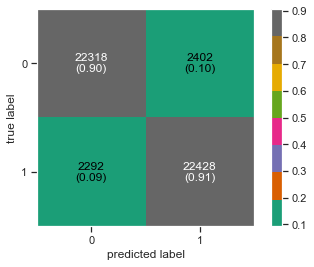

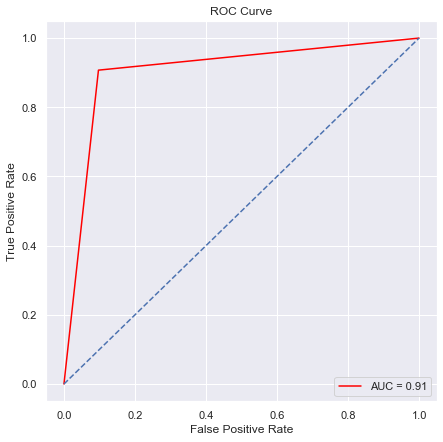

In [40]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=27,ratio = 1.0)
X_smote, Y_smote = sm.fit_sample(X,Y)

CBC=CatBoostClassifier(learning_rate=0.03)
pred = cross_val_predict(CBC, X_smote, Y_smote, cv=kf)
print("Cat Boost Classifier with Smote ")
print("Accuracy score:", round(accuracy_score(Y_smote, pred), 4), '\n')
print(confusion_matrix(Y_smote, pred))
print(classification_report(Y_smote, pred))

cms=confusion_matrix(Y_smote, pred)
fig, ax = plot_confusion_matrix(conf_mat=cms,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(7,7))
plt.title('ROC Curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
